# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

Continenti che si parlano e' meglio di Continenti indipendenti?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

se aumento il numero

### Independant Continents
11 Threads

Parameters: 

popolation = 3000  gen = 2000  

p = 4

- $80\%$ cross over

After generating the new generation of population i mutate every path with probabilities:

- $20\%$ for PairPermutation
- $10\%$ for Shift
- $10\%$ for Permutation
- $20\%$ for Inversion


### Communicating Continents

- Broadcasting Migration Data: The master process (rank 0) decides which individual (h) will be migrated and which processes (giver and receiver) will be involved. This data is then broadcasted to all processes.

- Sending and Receiving Individuals: The giver process sends the selected individual's path data to the receiver process. The receiver process then updates its population with the received path.

- Generation Update: After the potential migration, all processes proceed to generate a new generation of paths.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

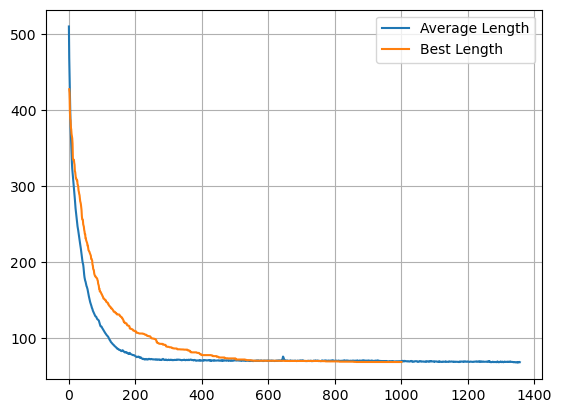

In [11]:
gen,L = np.loadtxt('DATA/AverageLength.dat', unpack=True)
x,best = np.loadtxt('DATA/BestLength.dat', unpack=True)
plt.plot(gen,L, label='Average Length')
plt.plot(x,best, label='Best Length',)
plt.grid()
plt.legend()
plt.show()

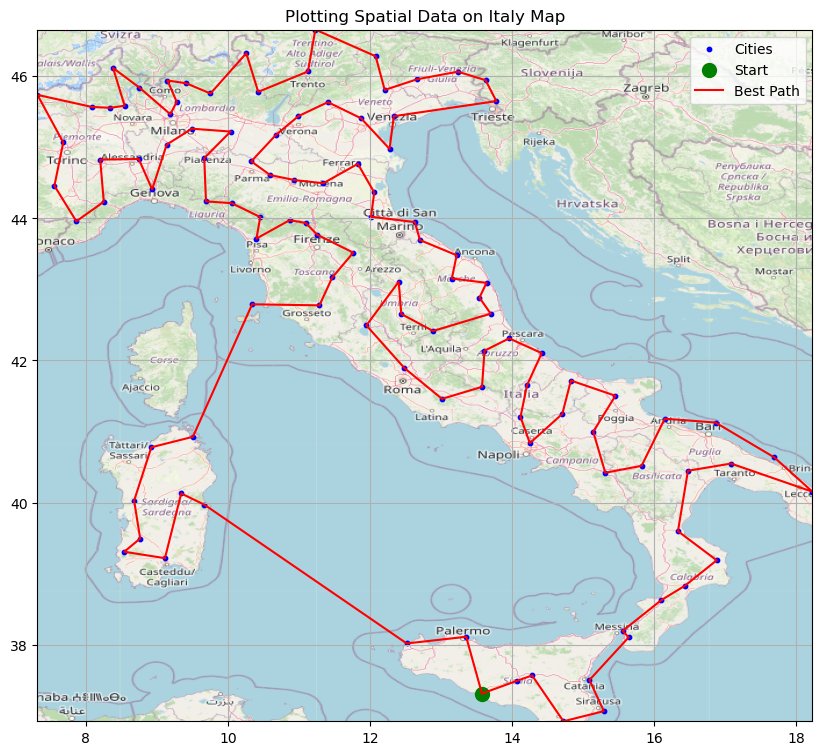

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load your data
x, y = np.loadtxt('DATA/Migration/0/BestPath.dat', unpack=True)

df = pd.read_csv('INPUT/cap_prov_ita.dat',sep=' ',header=None, names=['Latitude','Longitude'])

# Define the bounding box
BBox = ((df.Latitude.min(),   df.Latitude.max(),      
         df.Longitude.min(), df.Longitude.max()))

ruh_m = plt.imread('imgs/italy.png')

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df.Latitude, df.Longitude, zorder=1, alpha= 1, c='b', s=10, label='Cities')
ax.scatter(x[0],y[0], zorder=1, alpha= 1, c='g', s=100, label='Start')
ax.plot(x,y,marker=' ',color= 'red',label='Best Path')
ax.set_title('Plotting Spatial Data on Italy Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

ax.legend()
plt.grid()
plt.show()

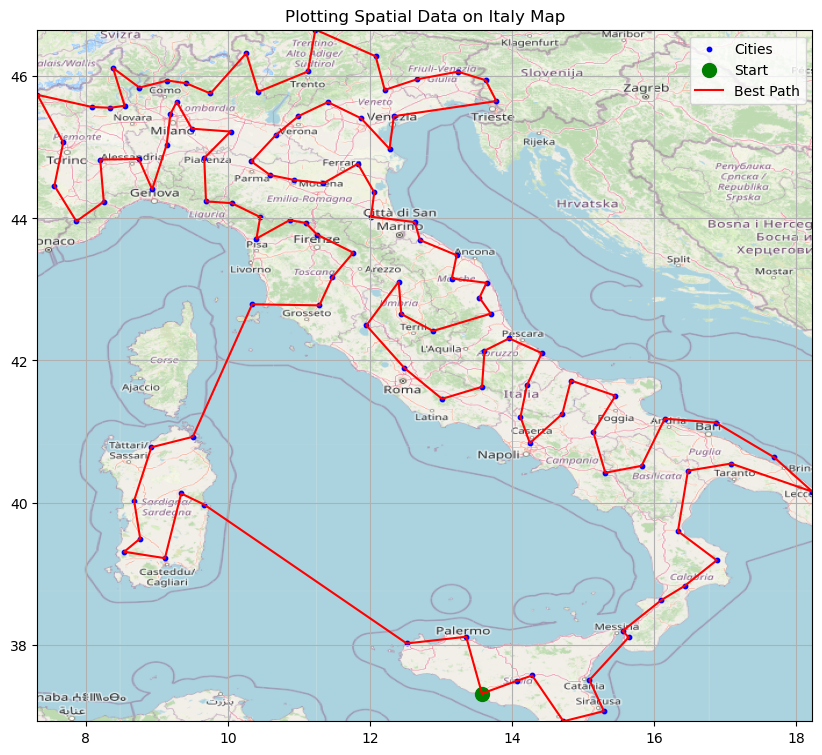

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load your data
x, y = np.loadtxt('DATA/Migration/0/BestPath.dat', unpack=True)

df = pd.read_csv('INPUT/cap_prov_ita.dat',sep=' ',header=None, names=['Latitude','Longitude'])

# Define the bounding box
BBox = ((df.Latitude.min(),   df.Latitude.max(),      
         df.Longitude.min(), df.Longitude.max()))

ruh_m = plt.imread('imgs/italy.png')

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df.Latitude, df.Longitude, zorder=1, alpha= 1, c='b', s=10, label='Cities')
ax.scatter(x[0],y[0], zorder=1, alpha= 1, c='g', s=100, label='Start')
ax.plot(x,y,marker=' ',color= 'red',label='Best Path')
ax.set_title('Plotting Spatial Data on Italy Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

ax.legend()
plt.grid()
plt.show()

/home/jiahao/anaconda3/lib/python3.11/site-packages/svgpathtools/path.py:3359: UserWarning: Replacing degenerate (zero radius) Arc with a Line: Arc(start=(265.81927+195.90044j), radius=0j, rotation=0.0, large_arc=0.0, sweep=0.0, end=(265.81927+195.90044j)) --> Line(start=(265.81927+195.90044j), end=(265.81927+195.90044j))
  warn('Replacing degenerate (zero radius) Arc with a Line: '


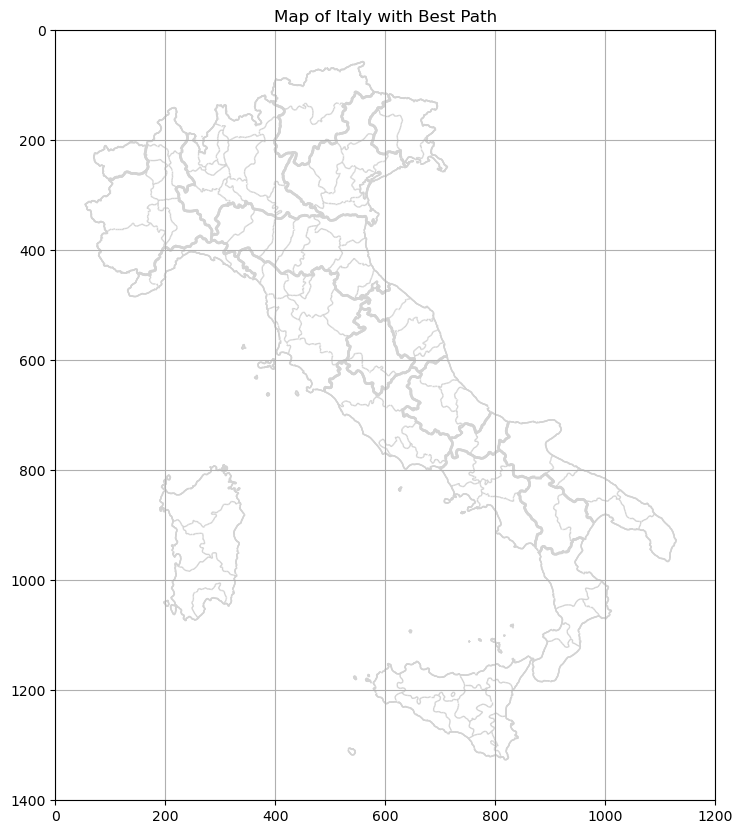

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import svg2paths2
import matplotlib.patches as patches
import matplotlib.transforms as transforms

# Load SVG file
svg_file = 'Italian_regions_provinces.svg'
paths, attributes, svg_attributes = svg2paths2(svg_file)

# Load your data
x, y = np.loadtxt('DATA/BestPath.dat', unpack=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the SVG paths
for path in paths:
    for line in path:
        if line.length() > 0:  # Filter out zero-length paths
            verts = [(line.start.real, line.start.imag), (line.end.real, line.end.imag)]
            codes = [1, 2]  # MOVETO, LINETO
            path_patch = patches.PathPatch(patches.Path(verts, codes), fill=False, edgecolor='lightgrey')
            ax.add_patch(path_patch)

# Transform SVG coordinates if necessary (optional, depending on SVG's coordinate system)
# e.g., flip vertically and scale
ax.set_xlim(0, 1200)  # Example limits, adjust as necessary
ax.set_ylim(1400, 0)  # Example limits, adjust as necessary
ax.set_aspect('equal')

# Additional plot settings
ax.grid(True)
ax.set_title("Map of Italy with Best Path")
plt.show()
